In [1]:
push!(LOAD_PATH, "../../lib");

In [2]:
using NaCsCalc.Format: Unc
using PyPlot
using LsqFit
using SpecialFunctions

In [3]:
data = readcsv("data/Cs_big_knife_x.csv", header=true)[1]

37×2 Array{Float64,2}:
 28.0  0.0087 
 27.5  0.01574
 27.0  0.0257 
 26.5  0.0378 
 26.0  0.05415
 25.5  0.0744 
 25.0  0.099  
 24.5  0.129  
 24.0  0.1636 
 23.5  0.2064 
 23.0  0.2634 
 22.5  0.3166 
 22.0  0.3784 
  ⋮           
 15.5  1.535  
 15.0  1.626  
 14.5  1.704  
 14.0  1.759  
 13.5  1.84   
 13.0  1.895  
 12.5  1.95   
 12.0  2.038  
 11.5  2.045  
 11.0  2.06   
 10.5  2.085  
 10.0  2.117  

In [4]:
# data[:, 1] .= data[:, 1] .* 1
# The first few data points includes clipping on the beam from somewhere else.
# Ignore them in the fitting
fitdata = data[1:(end - 5), :];

In [5]:
model(x, p) = p[1] .* (erf.((p[2] .- x) ./ p[3] .* sqrt(2)) .+ 1)

model (generic function with 1 method)

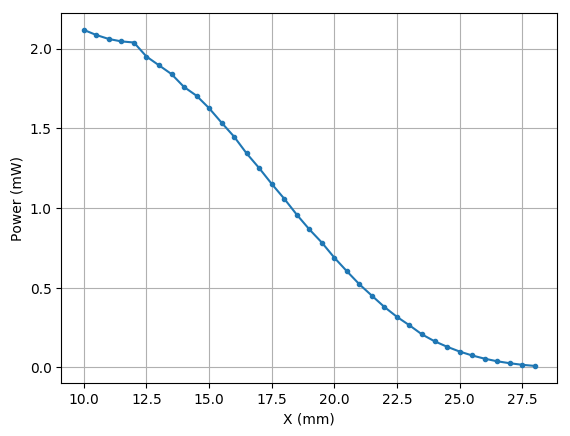

PyObject <matplotlib.text.Text object at 0x7ff8ee783198>

In [6]:
plot(data[:, 1], data[:, 2], ".-")
grid()
xlabel("X (mm)")
ylabel("Power (mW)")

In [7]:
fit = curve_fit(model, fitdata[:, 1], fitdata[:, 2], [1.1, 18.0, 7.5])
err = estimate_errors(fit)
@show Unc.(fit.param, err);

Unc.(fit.param, err) = NaCsCalc.Format.Unc{Float64}[1.091(13), 17.846(85), 8.72(14)]


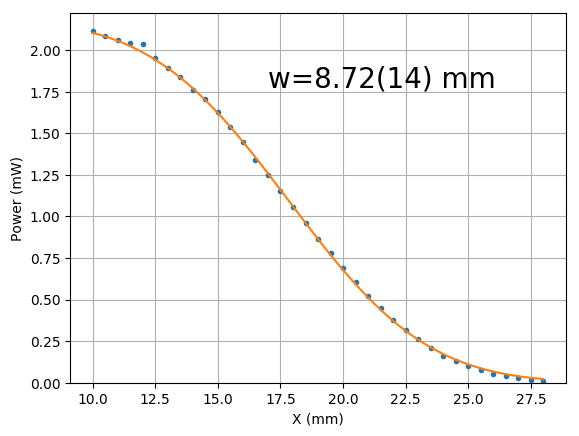

PyObject <matplotlib.text.Annotation object at 0x7ff8e69daba8>

In [8]:
plot(data[:, 1], data[:, 2], ".")
plotx = linspace(data[1, 1], data[end, 1], 1000)
plot(plotx, model.(plotx, (fit.param,)))
grid()
ylim([0, ylim()[2]])
xlabel("X (mm)")
ylabel("Power (mW)")
annotate("w=$(Unc(fit.param[3], err[3])) mm", xy=(0.4, 0.8), xycoords="axes fraction",
         size=20)